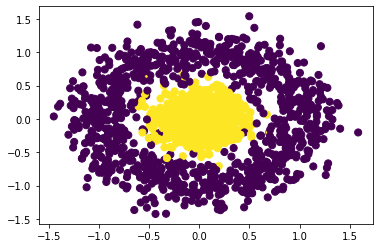

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import datasets
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

X, y = make_circles(n_samples = 2000, noise = 0.2, factor = 0.05, random_state=2021)
plt.scatter(X[:,0], X[:,1], c = y, s = 50)
plt.show()

In [2]:
  XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 1/3, random_state = 0)

#C와 gamma값만 변경

for C:0.01,gamma:scale,Model accuracy: 0.5187406296851574


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


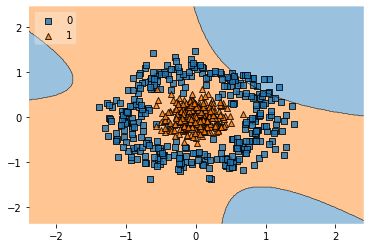

for C:0.01,gamma:0.1,Model accuracy: 0.4992503748125937


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


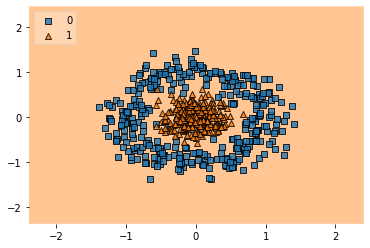

for C:0.01,gamma:10,Model accuracy: 0.5637181409295352


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


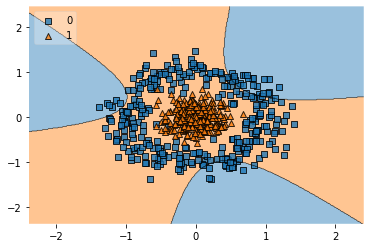

for C:1,gamma:scale,Model accuracy: 0.5637181409295352


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


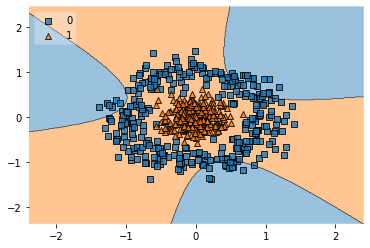

for C:1,gamma:0.1,Model accuracy: 0.512743628185907


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


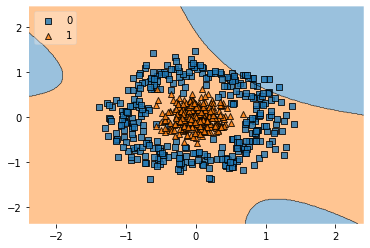

for C:1,gamma:10,Model accuracy: 0.5637181409295352


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


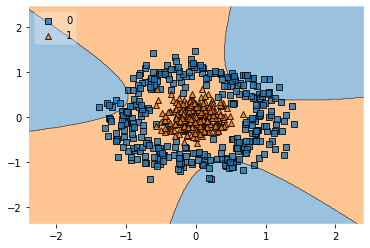

for C:1000,gamma:scale,Model accuracy: 0.5652173913043478


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


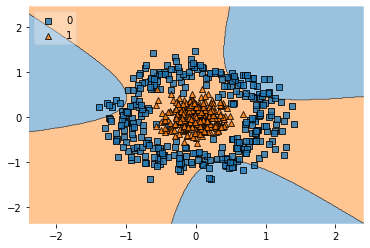

for C:1000,gamma:0.1,Model accuracy: 0.5637181409295352


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


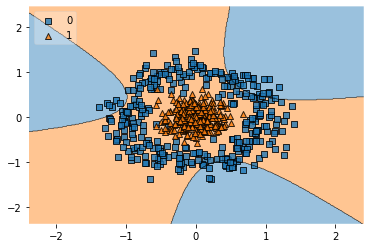

In [ ]:
#C와 gamma값만 변경

for c in [0.01,1,1000]:
  for g in ['scale',0.1,10]:
    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", C=c, gamma=g))
    ])
    poly_kernel_svm_clf.fit(XTrain,yTrain)
    yPred = poly_kernel_svm_clf.predict(XTest)
    accuracy = accuracy_score(yTest, yPred)x  
    print(f'for C:{c},gamma:{g},Model accuracy: {accuracy}')
    plot_decision_regions(XTest, yTest, clf=poly_kernel_svm_clf, legend=2) #plot을 해주는 함수 적용
    plt.show()

#degree에 대한 조사

In [ ]:
from sklearn.model_selection import GridSearchCV

poly_kernel_svm_clf = SVC(kernel="poly")

param = {'degree':[2,3,4,5,6,7,10,100,1000]}
clf = GridSearchCV(estimator = poly_kernel_svm_clf, param_grid=param, scoring='accuracy')
clf.fit(XTrain, yTrain)
best_estimator = clf.best_estimator_
print(clf.best_params_)

{'degree': 2}


In [ ]:
import pandas as pd

df = pd.DataFrame(clf.cv_results_)
df = df.sort_values(by='mean_test_score', ascending=False)
print(df[['params','mean_test_score']])

             params  mean_test_score
0     {'degree': 2}         0.987998
2     {'degree': 4}         0.983495
4     {'degree': 6}         0.981242
6    {'degree': 10}         0.972240
7   {'degree': 100}         0.945248
8  {'degree': 1000}         0.590600
1     {'degree': 3}         0.576909
3     {'degree': 5}         0.558143
5     {'degree': 7}         0.537135


In [6]:
from sklearn.model_selection import GridSearchCV

poly_kernel_svm_clf = SVC(kernel="poly", degree=2)


param = {'C' : [0.01,0.1,1,10,100], 'gamma' : [0.1,1,10,100]}
clf = GridSearchCV(estimator = poly_kernel_svm_clf, param_grid=param, scoring='accuracy')
clf.fit(XTrain, yTrain)
best_estimator = clf.best_estimator_
print(clf.best_params_)


{'C': 0.1, 'gamma': 10}


In [7]:
import pandas as pd

df = pd.DataFrame(clf.cv_results_)
df = df.sort_values(by='mean_test_score', ascending=False)
print(df[['params', 'mean_test_score']])  

                       params  mean_test_score
6     {'C': 0.1, 'gamma': 10}         0.988747
13      {'C': 10, 'gamma': 1}         0.988747
10      {'C': 1, 'gamma': 10}         0.987998
11     {'C': 1, 'gamma': 100}         0.987998
18    {'C': 100, 'gamma': 10}         0.987998
17     {'C': 100, 'gamma': 1}         0.987998
15    {'C': 10, 'gamma': 100}         0.987998
14     {'C': 10, 'gamma': 10}         0.987998
19   {'C': 100, 'gamma': 100}         0.987998
7    {'C': 0.1, 'gamma': 100}         0.987998
3   {'C': 0.01, 'gamma': 100}         0.987998
9        {'C': 1, 'gamma': 1}         0.986494
16   {'C': 100, 'gamma': 0.1}         0.986494
2    {'C': 0.01, 'gamma': 10}         0.986494
12    {'C': 10, 'gamma': 0.1}         0.975247
5      {'C': 0.1, 'gamma': 1}         0.975247
1     {'C': 0.01, 'gamma': 1}         0.933240
8      {'C': 1, 'gamma': 0.1}         0.933240
4    {'C': 0.1, 'gamma': 0.1}         0.549813
0   {'C': 0.01, 'gamma': 0.1}         0.549813


#degree 적용 후 C와 gamma에 의한 변화 가시화


for C:0.01,Model accuracy: 0.9820089955022488


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


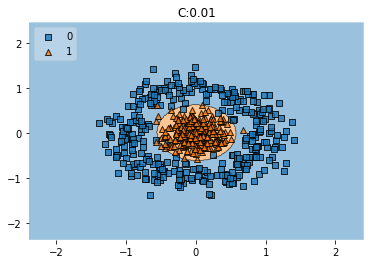

for C:1,Model accuracy: 0.9820089955022488


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


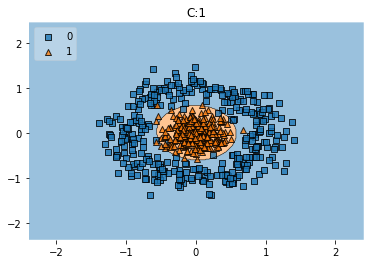

for C:1000,Model accuracy: 0.9820089955022488


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


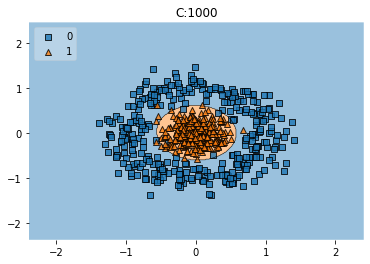

In [ ]:
for c in [0.01,1,1000]:
  poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", C=c, gamma=10,degree=2))])
  poly_kernel_svm_clf.fit(XTrain,yTrain)
  yPred = poly_kernel_svm_clf.predict(XTest)
  accuracy = accuracy_score(yTest, yPred)
  print(f'for C:{c},Model accuracy: {accuracy}')
  plot_decision_regions(XTest, yTest, clf=poly_kernel_svm_clf, legend=2)
  plt.title( f'C:{c}' )
  
  plt.show()

for gamma:0.01,Model accuracy: 0.4992503748125937


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


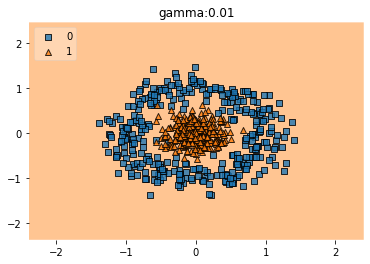

for gamma:1,Model accuracy: 0.9835082458770614


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


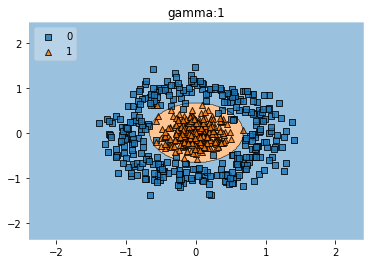

for gamma:10,Model accuracy: 0.9820089955022488


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


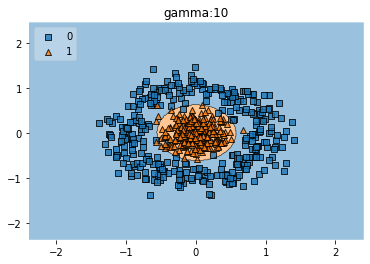

for gamma:100,Model accuracy: 0.9820089955022488


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


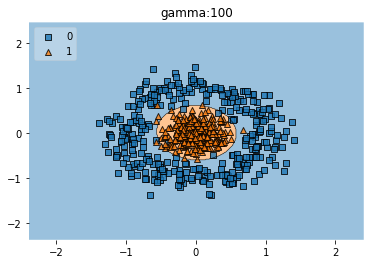

In [ ]:
for g in [0.01,1,10,100]:
  poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", C=0.01, gamma=g,degree=2))])
  poly_kernel_svm_clf.fit(XTrain,yTrain)
  yPred = poly_kernel_svm_clf.predict(XTest)
  accuracy = accuracy_score(yTest, yPred)
  print(f'for gamma:{g},Model accuracy: {accuracy}')
  plot_decision_regions(XTest, yTest, clf=poly_kernel_svm_clf, legend=2)
  plt.title( f'gamma:{g}' )
  
  plt.show()

#Best&Worst

##best

for C:0.01,gamma:10,Model accuracy: 0.9820089955022488


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


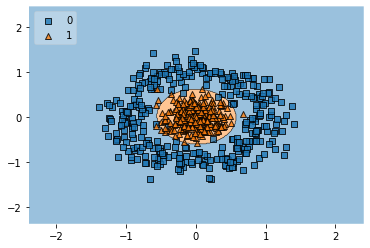

In [8]:
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", C=0.1, gamma=10,degree=2))])
poly_kernel_svm_clf.fit(XTrain,yTrain)
yPred = poly_kernel_svm_clf.predict(XTest)
accuracy = accuracy_score(yTest, yPred)
print(f'for C:{0.01},gamma:{10},Model accuracy: {accuracy}')
plot_decision_regions(XTest, yTest, clf=poly_kernel_svm_clf, legend=2) #plot을 해주는 함수 적용
plt.show()

##worst

for C:100,gamma:0.1,Model accuracy: 0.4992503748125937


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


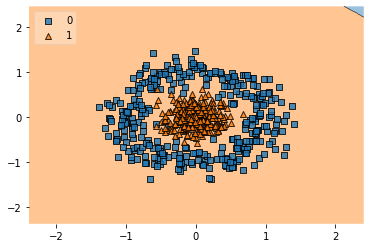

In [9]:
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", C=0.01, gamma=0.1,degree=7))])
poly_kernel_svm_clf.fit(XTrain,yTrain)
yPred = poly_kernel_svm_clf.predict(XTest)
accuracy = accuracy_score(yTest, yPred)
print(f'for C:{100},gamma:{0.1},Model accuracy: {accuracy}')
plot_decision_regions(XTest, yTest, clf=poly_kernel_svm_clf, legend=2) #plot을 해주는 함수 적용
plt.show()